In [1]:
import pandas as pd

In [27]:
df = pd.read_excel("./kospi.xlsx", usecols = [0,1,2,3,4], index_col = 'Date' )
df.head(1)

,Close,Open,High,Low
Date,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59


In [28]:
# 변동 파생변수
df['change'] = df['High'] - df['Low']
df.head(1)

,Close,Open,High,Low,change
Date,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59


In [29]:
# 전일변동 파생변수
df['전일변동'] = df['change'].shift()
df.head()

,Close,Open,High,Low,change,전일변동
Date,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32


In [30]:
# 목표가 = 시가 + 전일변동 * 0.5
df['목표가'] = df['Open'] + df['전일변동'] * 0.5
df.head(5)

,Close,Open,High,Low,change,전일변동,목표가
Date,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330


1. 목표가 보다 고가가 높으면 목표가로 매수
2. 수익률 -> 종가 - 목표가 / 목표가 + 1
3. 그 외의 수익률은 1

소연 풀이

In [25]:
for i in df.index :
    if df.loc[i, '목표가'] < df.loc[i, 'High'] :
        df.loc[i, 'rtn'] = (df.loc[i, 'Close'] - df.loc[i, '목표가']) / df.loc[i, '목표가'] + 1
    elif df.loc[i, '목표가'] >= df.loc[i, 'High'] :
        df.loc[i, 'rtn'] = 1


In [26]:
df

,Close,Open,High,Low,change,전일변동,목표가,rtn
Date,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000
...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000


교수님 풀이

In [35]:
import numpy as np

In [33]:
# 1.
acc_rtn = 1
for i in df.index :

    if df.loc[i, 'High'] > df.loc[i, '목표가'] :
        rtn = (df.loc[i, 'Close'] - df.loc[i, '목표가']) / df.loc[i, '목표가'] + 1
        df.loc[i, '수익률'] = rtn
       
    else :
        rtn = 1
        df.loc[i, '수익률'] = rtn

    acc_rtn *= rtn
    df.loc[i, '누적수익률'] = acc_rtn

In [34]:
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률
Date,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682


In [36]:
# 2.

# np.where(조건식, 참인 경우 값, 거짓인 경우 값)
df['수익률2'] = np.where(df['High'] >= df['목표가'], 
                      (df['Close'] - df['목표가']) / df['목표가'] + 1,
                      1)

In [38]:
(df['수익률'] == df['수익률2']).value_counts()

True    5349
dtype: int64

In [39]:
# 누적수익률
# 누적곱 -> cumprod()
df['누적수익률2'] = df['수익률2'].cumprod()

In [40]:
(df['누적수익률'] == df['누적수익률2']).value_counts()

True    5349
dtype: int64

In [47]:
## CAGR -> 연복리수익률
## 누적수익률 ** (1 - (투자기간/365)) - 1
# 시계열 데이터를 이용하여 기간
delta = df.index[-1] - df.index[0]
delta.days

7906

In [45]:
year = delta.days/365
CAGR = df['누적수익률'].iloc[-1] ** (1 / year) - 1
print('CAGR : ', CAGR * 100)

CAGR :  7.941722848934241


In [48]:
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2
Date,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000,1.000000,1.000000
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000,1.000000,1.000000
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000,1.000000,1.000000
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000,1.000000,1.000000
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.000000,5.237280
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.000000,5.237280
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.000000,5.237280


In [61]:
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Darwin' :
    plt.rc('font', family = 'AppleGothic')
else :
    plt.rc('font', family = 'Malgun Gothic')

소연 풀이

In [66]:
# b&h
for i in df.index :
    df.loc[i, 'b&h'] = (df['Close'][i] - df['Close'][-1])/df['Close'][i] + 1


In [67]:
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,b&h
Date,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000,1.000000,1.000000,-0.959189
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000,1.000000,1.000000,-1.177399
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000,1.000000,1.000000,-1.261795
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000,1.000000,1.000000,-1.303537
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000,1.000000,1.000000,-1.174405
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.000000,5.237280,0.985862
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.000000,5.237280,1.001402
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.000000,5.237280,1.004103


교수님 풀이

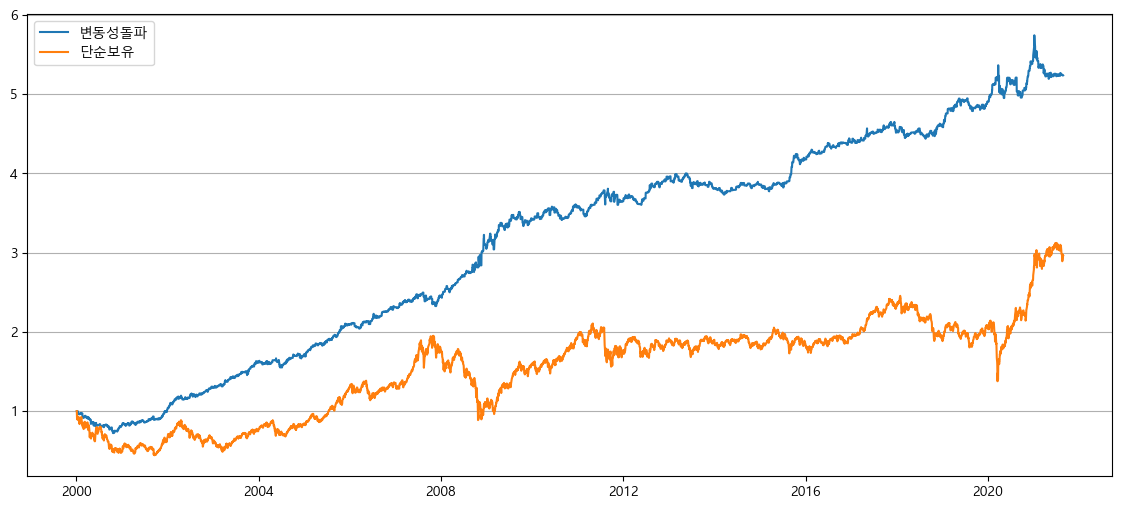

In [64]:
# 변동성돌파전략의 누적 수익률 라인그래프 표시
# 바이앤홀드 누적 수익률 라인 그래프 표시
plt.figure(figsize=(14,6))
plt.grid(True, axis= 'y')
plt.plot(df['누적수익률'], label = '변동성돌파')
plt.plot(df['Close'] / df['Close'].iloc[0], label = '단순보유')
plt.legend()
plt.show()

In [65]:
df['Close'] / df['Close'].iloc[0]

Date
2000-01-04    1.000000
2000-01-05    0.931325
2000-01-06    0.907227
2000-01-07    0.895764
2000-01-10    0.932203
                ...   
2021-08-23    2.917935
2021-08-24    2.963344
2021-08-25    2.971380
2021-08-26    2.954119
2021-08-27    2.959189
Name: Close, Length: 5349, dtype: float64

In [71]:
# Draw Down(DD)  -> 하나의 매매신호 전고점대비 얼마나 떨어졌는지 : 낙폭
# MDD : Max DD -> 최대 낙폭
## DD = (1 - 누적수익률 / 전고점) * 100 
df['전고점'] = df['누적수익률'].cummax()
df['DD'] = (1 - df['누적수익률'] / df['전고점']) * 100
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,전고점,DD
Date,,,,,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682,0.999504,5.234682,5.739762,8.799672


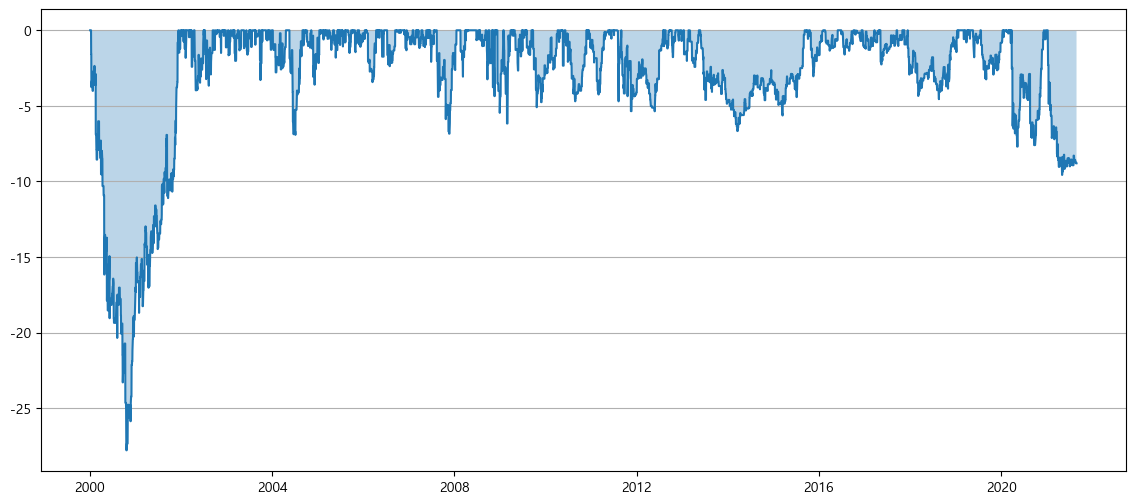

In [74]:
plt.figure(figsize = (14,6))
plt.grid(True, axis = 'y')
plt.plot(-df['DD'])
plt.fill_between(df.index, -df['DD'], alpha = 0.3)
plt.rc('axes',unicode_minus=False)
plt.show()

In [75]:
print('MDD : ', df['DD'].max()) #  DD는 낮아야 좋다. 27이면 상당히 높은 편

MDD :  27.779726849588627


In [76]:
# 이동평균선 10일치
df['MA10'] = df['Close'].rolling(10).mean()
df.iloc[8:12]

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,전고점,DD,MA10
Date,,,,,,,,,,,,,,
2000-01-14,948.03,958.82,970.59,937.75,32.84,21.48,969.560,0.977794,0.962386,0.977794,0.962386,1.0,3.761404,NaN
2000-01-17,983.27,962.67,986.09,950.75,35.34,32.84,979.090,1.004269,0.966495,1.004269,0.966495,1.0,3.350535,976.072
2000-01-18,981.53,992.31,992.85,967.96,24.89,35.34,1009.980,1.000000,0.966495,1.000000,0.966495,1.0,3.350535,968.321
2000-01-19,938.78,969.31,977.00,938.74,38.26,24.89,981.755,1.000000,0.966495,1.000000,0.966495,1.0,3.350535,963.568


In [77]:
df['매매신호'] = df['Open'] > df['MA10'].shift(1)

In [78]:
df

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,전고점,DD,MA10,매매신호
Date,,,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,False
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,False
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,False
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,False
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419,3165.447,False
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419,3153.235,False
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419,3143.597,False


In [79]:
# 수익률 계산 방법 -> 매매신호가 1이고, 고가가 목표가보다 높은 경우
df['수익률2'] = np.where(
    (df['매매신호'] == 1) & (df['High'] >= df['목표가']),
    df['Close'] / df['목표가'],
    1
)

In [80]:
df['누적수익률2'] = df['수익률2'].cumprod()

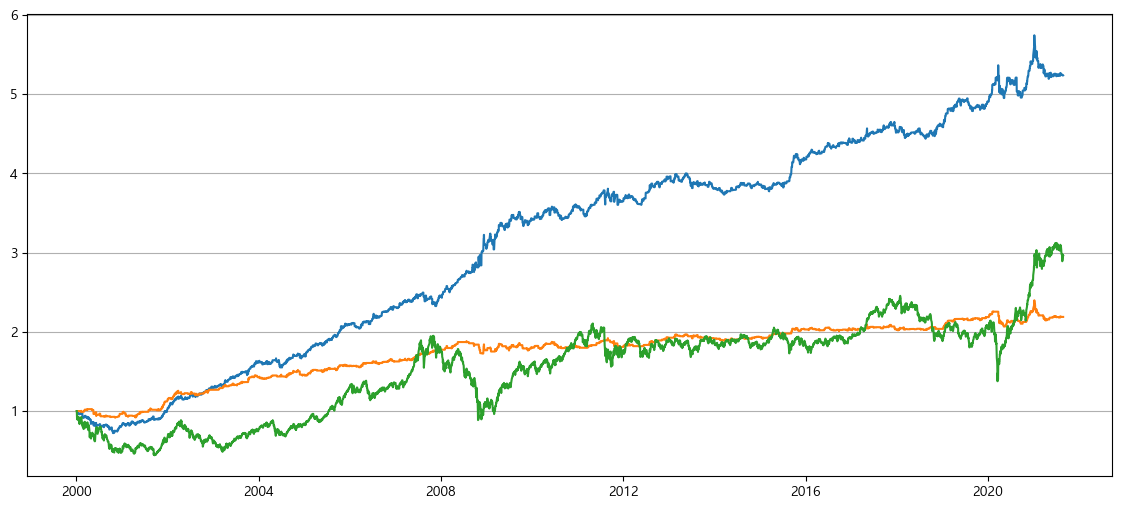

In [85]:
# 변동성돌파
# buy&hold
# 이동평균선

plt.figure(figsize = (14,6))
plt.grid(True, axis = 'y')
plt.plot(df['누적수익률'], label = '변동성돌파')
plt.plot(df['누적수익률2'], label = '변동성돌파(마켓)')
plt.plot(df['Close'] / df['Close'].iloc[0], label = '단순보유')
plt.rc('axes',unicode_minus=False)
plt.show()

In [86]:
df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1 - df['누적수익률2'] / df['전고점2']) * 100
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,전고점,DD,MA10,매매신호,전고점2,DD2
Date,,,,,,,,,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.0,2.187659,5.739762,8.754419,3165.447,False,2.397249,8.742933
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.0,2.187659,5.739762,8.754419,3153.235,False,2.397249,8.742933
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.0,2.187659,5.739762,8.754419,3143.597,False,2.397249,8.742933
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280,1.0,2.187659,5.739762,8.754419,3134.388,True,2.397249,8.742933
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682,1.0,2.187659,5.739762,8.799672,3126.940,False,2.397249,8.742933


In [90]:
print('MDD2 :', df['DD2'].max())

MDD2 : 10.556892232762005


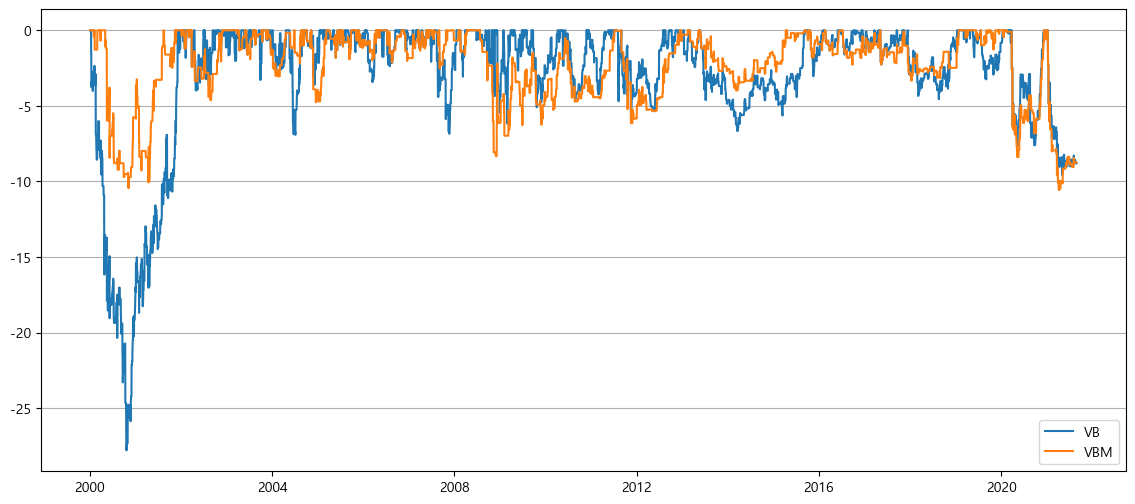

In [91]:
plt.figure(figsize = (14,6))
plt.grid(True, axis = 'y')
plt.plot(-df['DD'], label = 'VB')
plt.plot(-df['DD2'], label = 'VBM')
plt.legend()
plt.show()

In [92]:
# 이동평균선을 매매신호로 포함시키냐 마냐의 차의
# MDD2 : 이동평균선을 매매신호로 포함시켰을 때 낙폭 -> 낙폭의 절댓값 크기가 작아졌음 -> Low Risk -> 그만큼 Low Return